In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load phenotype z score table

In [123]:
CRISPRi_zscores = pd.read_csv('~/github/THP1_PrimaryMac_CRISPR/Perturbseq/CRISPRi_zscore_table_subset.csv')

In [126]:
CRISPRi_zscores.set_index('Unnamed: 0', inplace = True)

In [127]:
print(CRISPRi_zscores.shape)

(15, 74)
(15, 153)


In [145]:
CRISPRi_zscores = CRISPRi_zscores.transpose()

## See if genes that have interactions are more correlated

In [100]:
protein_info = pd.read_csv('~/github/THP1_PrimaryMac_CRISPR/Additional_Paper_Analyses/9606.protein.info.v12.0.txt', sep = '\t')

In [101]:
#all interactions
protein_interactions = pd.read_csv('~/github/THP1_PrimaryMac_CRISPR/Additional_Paper_Analyses/9606.protein.links.full.v12.0.txt', sep = ' ')

In [102]:
protein_info.head()

,#string_protein_id,preferred_name,protein_size,annotation
0,9606.ENSP00000000233,ARF5,180,ADP-ribosylation factor 5; GTP-binding protein...
1,9606.ENSP00000000412,M6PR,277,Cation-dependent mannose-6-phosphate receptor;...
2,9606.ENSP00000001008,FKBP4,459,"Peptidyl-prolyl cis-trans isomerase FKBP4, N-t..."
3,9606.ENSP00000001146,CYP26B1,512,Cytochrome P450 26B1; Involved in the metaboli...
4,9606.ENSP00000002125,NDUFAF7,441,"Protein arginine methyltransferase NDUFAF7, mi..."


In [103]:
protein_interactions = pd.merge(protein_interactions, protein_info[['#string_protein_id', 'preferred_name']], left_on = 'protein1', right_on = '#string_protein_id', how = 'left')

In [104]:
protein_interactions.rename(columns = {'preferred_name': 'gene1'}, inplace = True)

In [105]:
protein_interactions = pd.merge(protein_interactions, protein_info[['#string_protein_id', 'preferred_name']], left_on = 'protein2', right_on = '#string_protein_id', how = 'left')

In [106]:
protein_interactions.rename(columns = {'preferred_name': 'gene2'}, inplace = True)

In [107]:
protein_interactions.head()

,protein1,protein2,neighborhood,neighborhood_transferred,fusion,cooccurence,homology,coexpression,coexpression_transferred,experiments,experiments_transferred,database,database_transferred,textmining,textmining_transferred,combined_score,#string_protein_id_x,gene1,#string_protein_id_y,gene2
0,9606.ENSP00000000233,9606.ENSP00000356607,0,0,0,0,0,0,45,0,134,0,0,0,81,173,9606.ENSP00000000233,ARF5,9606.ENSP00000356607,RALGPS2
1,9606.ENSP00000000233,9606.ENSP00000427567,0,0,0,0,0,0,0,0,128,0,0,0,70,154,9606.ENSP00000000233,ARF5,9606.ENSP00000427567,FHDC1
2,9606.ENSP00000000233,9606.ENSP00000253413,0,0,0,0,0,49,111,0,49,0,0,0,69,151,9606.ENSP00000000233,ARF5,9606.ENSP00000253413,ATP6V1E1
3,9606.ENSP00000000233,9606.ENSP00000493357,0,0,0,0,0,56,0,0,53,0,0,433,81,471,9606.ENSP00000000233,ARF5,9606.ENSP00000493357,CYTH2
4,9606.ENSP00000000233,9606.ENSP00000324127,0,0,0,0,0,0,0,0,46,0,0,153,91,201,9606.ENSP00000000233,ARF5,9606.ENSP00000324127,PSD3


## Load correlations

In [146]:
CRISPRi_correlations_pheno_only = pd.read_csv('~/github/THP1_PrimaryMac_CRISPR/Additional_Paper_Analyses/CRISPRi_correlated_gene_pairs_phenotypes.csv')

In [152]:
CRISPRi_correlations_pheno_only_subset = CRISPRi_correlations_pheno_only.loc[CRISPRi_correlations_pheno_only['Gene1'].isin(CRISPRi_zscores.index) & CRISPRi_correlations_pheno_only['Gene2'].isin(CRISPRi_zscores.index)]

In [154]:
CRISPRi_correlations_pheno_only_subset = CRISPRi_correlations_pheno_only_subset.reset_index(drop = True)

### Transcriptomics only

In [177]:
CRISPRi_correlations_rna_only = pd.read_csv('~/github/THP1_PrimaryMac_CRISPR/Additional_Paper_Analyses/CRISPRi_transcriptomicsonly_correlations.csv')

In [178]:
CRISPRi_correlations_rna_only.drop(columns = 'Unnamed: 0', inplace = True)

In [179]:
CRISPRi_correlations_rna_only_subset = CRISPRi_correlations_rna_only.loc[CRISPRi_correlations_rna_only['Gene1'].isin(CRISPRi_zscores.index) & CRISPRi_correlations_rna_only['Gene2'].isin(CRISPRi_zscores.index)]

In [181]:
CRISPRi_correlations_rna_only_subset = CRISPRi_correlations_rna_only_subset.reset_index(drop = True)

### Load correlations with transcriptomics

In [191]:
CRISPRi_correlations_combined = pd.read_csv('~/github/THP1_PrimaryMac_CRISPR/Additional_Paper_Analyses/CRISPRi_correlated_gene_pairs_phenotypes_withTranscriptomics_subset.csv')

In [192]:
CRISPRi_correlations_combined.drop(columns = 'Unnamed: 0', inplace = True)

In [196]:
CRISPRi_correlations_combined_subset = CRISPRi_correlations_combined.loc[CRISPRi_correlations_combined['Gene1'].isin(CRISPRi_zscores.index) & CRISPRi_correlations_combined['Gene2'].isin(CRISPRi_zscores.index)]

In [197]:
CRISPRi_correlations_combined_subset = CRISPRi_correlations_combined_subset.reset_index(drop = True)

### CRISPRi

In [263]:
all_CRISPRi_genes = unique_elements = set(list(CRISPRi_correlations_pheno_only_subset['Gene1']) + list(CRISPRi_correlations_pheno_only_subset['Gene2']))

In [362]:
len(all_CRISPRi_genes)

74

In [264]:
protein_interactions_CRISPRi_subset = protein_interactions.loc[(protein_interactions['gene1'].isin(all_CRISPRi_genes)) & (protein_interactions['gene2'].isin(all_CRISPRi_genes))]

In [265]:
protein_interactions_CRISPRi_subset['sorted_genes'] = protein_interactions_CRISPRi_subset.apply(lambda x: sorted([x['gene1'], x['gene2']]), axis=1)

/tmp/ipykernel_3718729/3439647783.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  protein_interactions_CRISPRi_subset['sorted_genes'] = protein_interactions_CRISPRi_subset.apply(lambda x: sorted([x['gene1'], x['gene2']]), axis=1)


In [266]:
CRISPRi_correlations_pheno_only_subset['sorted_genes'] = CRISPRi_correlations_pheno_only_subset.apply(lambda x: sorted([x['Gene1'], x['Gene2']]), axis=1)

In [267]:
protein_interactions_CRISPRi_subset['interaction'] = True

/tmp/ipykernel_3718729/1349224048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  protein_interactions_CRISPRi_subset['interaction'] = True


In [268]:
CRISPRi_correlations_protein_subset = pd.merge(CRISPRi_correlations_pheno_only_subset, protein_interactions_CRISPRi_subset[['gene1', 'gene2', 'interaction', 'combined_score']], how = 'left', left_on = ['Gene1', 'Gene2'], right_on = ['gene1', 'gene2'])

In [269]:
CRISPRi_correlations_protein_subset.loc[(CRISPRi_correlations_protein_subset['Gene2'] == 'TYROBP') & (CRISPRi_correlations_protein_subset['Gene1'] == 'TREM2')]

,Gene1,Gene2,Correlation,sorted_genes,gene1,gene2,interaction,combined_score
6,TREM2,TYROBP,0.82895,"[TREM2, TYROBP]",TREM2,TYROBP,True,999.0


In [270]:
CRISPRi_correlations_protein_subset_nona = CRISPRi_correlations_protein_subset.dropna()

In [271]:
CRISPRi_correlations_protein_subset_nona['Correlation'].max()

0.9530364568942952

In [272]:
CRISPRi_correlations_protein_subset_nona['Correlation'].min()

-0.897510415

In [273]:
CRISPRi_correlations_protein_subset2 = pd.merge(CRISPRi_correlations_rna_only_subset, protein_interactions_CRISPRi_subset[['gene1', 'gene2', 'interaction', 'combined_score']], how = 'left', left_on = ['Gene1', 'Gene2'], right_on = ['gene1', 'gene2'])

In [274]:
CRISPRi_correlations_protein_subset2.loc[(CRISPRi_correlations_protein_subset2['Gene2'] == 'TYROBP') & (CRISPRi_correlations_protein_subset2['Gene1'] == 'TREM2')]

,Gene1,Gene2,Correlation,gene1,gene2,interaction,combined_score
1902,TREM2,TYROBP,-0.425208,TREM2,TYROBP,True,999.0


In [275]:
CRISPRi_correlations_protein_subset_nona2 = CRISPRi_correlations_protein_subset2.dropna()

In [276]:
CRISPRi_correlations_protein_subset3 = pd.merge(CRISPRi_correlations_combined_subset, protein_interactions_CRISPRi_subset[['gene1', 'gene2', 'interaction', 'combined_score']], how = 'left', left_on = ['Gene1', 'Gene2'], right_on = ['gene1', 'gene2'])

In [277]:
CRISPRi_correlations_protein_subset3.loc[(CRISPRi_correlations_protein_subset3['Gene2'] == 'TYROBP') & (CRISPRi_correlations_protein_subset3['Gene1'] == 'TREM2')]

,Gene1,Gene2,Correlation,gene1,gene2,interaction,combined_score
84,TREM2,TYROBP,0.546511,TREM2,TYROBP,True,999.0


In [278]:
CRISPRi_correlations_protein_subset_nona3 = CRISPRi_correlations_protein_subset3.dropna()

In [340]:
# bins = [-1, -0.45, -0.25, 0.25, 0.6, 1]
# labels = ['-1 to -0.45', '-0.45 to -0.25', '-0.25 to 0.25', '0.25 to 0.6', '0.6 to 1']

bins = [-1, 0.5, 1]
labels = ['Low Correlation (< 0.5)', 'High Correlation (>= 0.5)']

# Create a new column for bins
CRISPRi_correlations_protein_subset_nona['Bin'] = pd.cut(CRISPRi_correlations_protein_subset_nona['Correlation'], bins=bins, labels=labels, include_lowest=True)
CRISPRi_correlations_protein_subset_nona2['Bin'] = pd.cut(CRISPRi_correlations_protein_subset_nona2['Correlation'], bins=bins, labels=labels, include_lowest=True)
CRISPRi_correlations_protein_subset_nona3['Bin'] = pd.cut(CRISPRi_correlations_protein_subset_nona3['Correlation'], bins=bins, labels=labels, include_lowest=True)

/tmp/ipykernel_3718729/219020783.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CRISPRi_correlations_protein_subset_nona['Bin'] = pd.cut(CRISPRi_correlations_protein_subset_nona['Correlation'], bins=bins, labels=labels, include_lowest=True)
/tmp/ipykernel_3718729/219020783.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CRISPRi_correlations_protein_subset_nona2['Bin'] = pd.cut(CRISPRi_correlations_protein_subset_nona2['Correlation'], bins=bins, labels=labels, include_lowest=True)
/tmp/ipykernel_371

In [341]:
grouped = CRISPRi_correlations_protein_subset_nona.groupby('Bin')['combined_score'].apply(list)
boxplot_data = pd.DataFrame(grouped.explode()).reset_index()

/tmp/ipykernel_3718729/4069685850.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = CRISPRi_correlations_protein_subset_nona.groupby('Bin')['combined_score'].apply(list)


In [342]:
grouped2 = CRISPRi_correlations_protein_subset_nona2.groupby('Bin')['combined_score'].apply(list)
boxplot_data2 = pd.DataFrame(grouped2.explode()).reset_index()

/tmp/ipykernel_3718729/2972859569.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped2 = CRISPRi_correlations_protein_subset_nona2.groupby('Bin')['combined_score'].apply(list)


In [343]:
grouped3 = CRISPRi_correlations_protein_subset_nona3.groupby('Bin')['combined_score'].apply(list)
boxplot_data3 = pd.DataFrame(grouped3.explode()).reset_index()

/tmp/ipykernel_3718729/2324710998.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped3 = CRISPRi_correlations_protein_subset_nona3.groupby('Bin')['combined_score'].apply(list)


In [344]:
boxplot_data3['matrix'] = 'Pheno+Transcriptomics'
boxplot_data2['matrix'] = 'Transcriptomics'
boxplot_data['matrix'] = 'Phenotypes'

In [345]:
boxplot_data = pd.concat([boxplot_data, boxplot_data2, boxplot_data3])

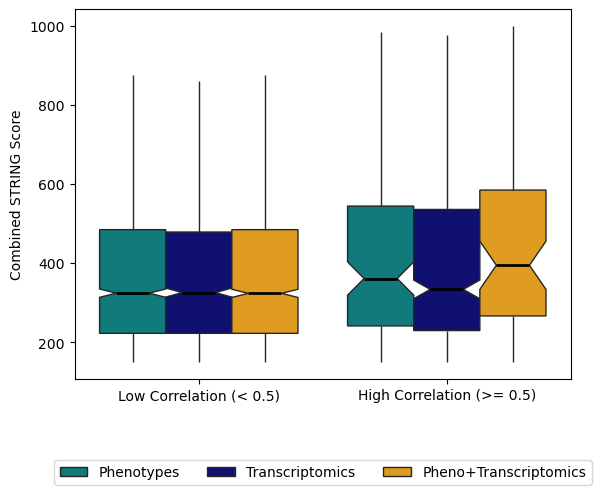

In [350]:
colors = ['darkcyan', 'navy','orange']
sns.boxplot(boxplot_data, x = 'Bin', y = 'combined_score', notch=True, showcaps=False, medianprops={"color": "black", "linewidth": 2}, hue = 'matrix', palette = colors, showfliers = False)
plt.xlabel('')
plt.ylabel('Combined STRING Score')
plt.legend(title='', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3)
plt.savefig("CRISPRi_CORUM_boxplot_NEW.pdf", format='pdf',  bbox_inches='tight')